<a href="https://colab.research.google.com/github/ne-adrita/Predicting-Sleep-Quality-through-Behavioral-Pattern-Recognition/blob/main/HistGradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 HistGradientBoosting Regressor Results
MAE: 2.5134350594043933
MSE: 8.765384823202798
R² Score: -0.07976013786851266

📊 HistGradientBoosting Classifier Results
Accuracy: 0.34
Classification Report:
               precision    recall  f1-score   support

        Poor       0.40      0.49      0.44       394
     Average       0.34      0.26      0.30       310
        Good       0.24      0.22      0.23       296

    accuracy                           0.34      1000
   macro avg       0.33      0.32      0.32      1000
weighted avg       0.33      0.34      0.33      1000

Confusion Matrix:
 [[193  80 121]
 [137  81  92]
 [155  75  66]]


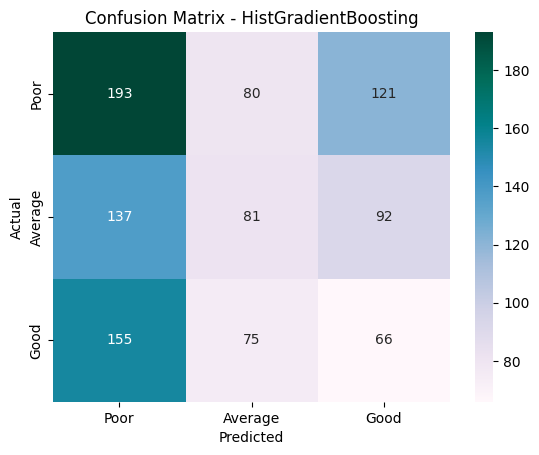

In [1]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 2: Load Dataset
df = pd.read_csv('/content/sleep_pattern_analysis_datasett.csv')

# 🧹 Step 3: Clean Data
df.drop('Person_ID', axis=1, inplace=True)
df['Work Hours (hrs/day)'] = pd.to_numeric(df['Work Hours (hrs/day)'], errors='coerce')
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.dropna(inplace=True)

# 🎯 Step 4: Feature and Target Split
X = df.drop('Sleep Quality', axis=1)
y_reg = df['Sleep Quality']
y_class = y_reg.apply(lambda x: 0 if x <= 4 else (1 if x <= 7 else 2))

# ⚖️ Step 5: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 🧠 Step 6A: HistGradientBoosting Regressor
# -----------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

hgb_reg = HistGradientBoostingRegressor(random_state=42)
hgb_reg.fit(X_train_r, y_train_r)
y_pred_r = hgb_reg.predict(X_test_r)

print("📊 HistGradientBoosting Regressor Results")
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", r2_score(y_test_r, y_pred_r))

# -----------------------------
# 🧠 Step 6B: HistGradientBoosting Classifier
# -----------------------------
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

hgb_clf = HistGradientBoostingClassifier(random_state=42)
hgb_clf.fit(X_train_c, y_train_c)
y_pred_c = hgb_clf.predict(X_test_c)

print("\n📊 HistGradientBoosting Classifier Results")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c, target_names=["Poor", "Average", "Good"]))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

# 🔍 Confusion Matrix Plot
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=["Poor", "Average", "Good"],
            yticklabels=["Poor", "Average", "Good"])
plt.title("Confusion Matrix - HistGradientBoosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
